## **0. Mounting Google Drive / Installing Packages / Importing Files**

[Importing .py files from colab](https://www.pingshiuanchua.com/blog/post/importing-your-own-python-module-or-python-file-in-colaboratory)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install pydrive

     |████████████████████████████████| 993kB 3.9MB/s 
  Created wheel for pydrive: filename=PyDrive-1.3.1-cp36-none-any.whl size=27437 sha256=cb21daeab2f95f0e139f2dea75bf186dde6224abf9814b8cea2e3a9b757f4561
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
rdkit_installfile = drive.CreateFile({'id':'1MnNtztDfr8DRIJtwuejlNGtzxvS5wk-1'})
rdkit_installfile.GetContentFile('rdkit_install.py')

In [ ]:
!python rdkit_install.py

add /root/miniconda/lib/python3.6/site-packages to PYTHONPATH
python version: 3.6.8
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
PREFIX=/root/miniconda
Unpacking payload ...
Solving environment: - \ | done

## Package Plan ##

  environment location: /root/miniconda

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==0.24.0=py37_0
    - bzip2==1.0.8=h7b6447c_0
    - ca-certificates==2019.5.15=0
    - certifi==2019.6.16=py37_0
    - cffi==1.12.3=py37h2e261b9_0
    - chardet==3.0.4=py37_1
    - conda-package-handling==1.3.11=py37_0
    - conda==4.7.10=py37_0
    - cryptography==2.7=py37h1ba5d50_0
    - idna==2.8=py37_0
    - libarchive==3.3.3=h5d8350f_5
    - libedit==3.1.20181209=hc058e9b_0
    - libffi==3.2.1=hd88cf55_4
    - libgcc-ng==9.1.0=hdf63c60_0
    - libstdcxx-ng==9.1.0=hdf63c60_0
    - libxml2==2.9.9=hea5a465_1
    - lz4-c==1.8.1.2=h14c3975_0
    - lzo==2.

In [ ]:

#https://iwatobipen.wordpress.com/2018/11/01/run-rdkit-and-deep-learning-on-google-colab-rdkit/
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/root/miniconda/lib/python3.6/site-packages')


import numpy as np
import json
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [ ]:
MoleculeVAEfile = drive.CreateFile({'id':'1NgP-FGWwabWK1kUsP2fiUhio_YLbz1lu'})
MoleculeVAEfile.GetContentFile('MoleculeVAE.py')

MoleculeVAEfunctionsfile = drive.CreateFile({'id':'1fG30DMBBuuqIVmL6iuwUvwu6KRplEq4i'})
MoleculeVAEfunctionsfile.GetContentFile('MoleculeVAEfunctions.py')

import MoleculeVAE
import MoleculeVAEfunctions

Using TensorFlow backend.


## **1. VAE Model and Molecule Reconstruction**
Validation accuracy of the model 0.99, trained on 80% of all molecules on Chembl and validated on the rest. 


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

W0902 08:10:06.931169 139793184921472 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


#### Importing the Model and Character Set

In [ ]:
#number of dimenions the model was trained with
latent_dim = 292

trained_model = 'drive/My Drive/Colab Notebooks/VAE - Thesis/chembl_23_model.h5'
charset_file = 'drive/My Drive/Colab Notebooks/VAE - Thesis/charset.json'

with open('drive/My Drive/Colab Notebooks/VAE - Thesis/charset.json', 'r') as outfile:
    charset = json.load(outfile)

from MoleculeVAE import MoleculeVAE
model = MoleculeVAE()

model.load(charset, trained_model, latent_rep_size = latent_dim)


W0902 08:10:08.843968 139793184921472 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0902 08:10:08.885563 139793184921472 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0902 08:10:08.897841 139793184921472 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0902 08:10:09.139947 139793184921472 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4409: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0902 08:10:15.601130 139793184921472 deprecation_wra

### Reconstructing the Original Molecule

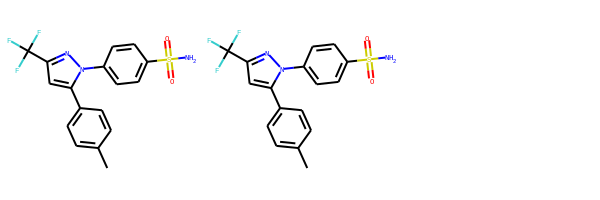

In [ ]:
from MoleculeVAEfunctions import encode_smiles
from MoleculeVAEfunctions import decode_latent_molecule

#make sure smiles are canonicalized 
smiles = 'CC(=O)Nc1ccc(O)cc1'
smiles = 'Cc1ccc(cc1)c2cc(nn2c3ccc(cc3)S(=O)(=O)N)C(F)(F)F'

smiles_latent = encode_smiles(smiles, model, charset)
smiles_latent.shape

#smiles_latent
reconstructed_smiles = decode_latent_molecule(smiles_latent, model, charset, latent_dim)
original = Chem.MolFromSmiles(smiles)
reconstructed = Chem.MolFromSmiles(reconstructed_smiles)

Draw.MolsToGridImage([original, reconstructed])

#### Reconstructing it 1000 Times

In [ ]:
from MoleculeVAEfunctions import encode_smiles
from MoleculeVAEfunctions import decode_latent_molecule


rec_smiles = []
for x in range(0,1000):
  smiles_latent = encode_smiles(smiles, model, charset)
  reconstructed_smiles = decode_latent_molecule(smiles_latent, model, charset, latent_dim)
  rec_smiles.append(reconstructed_smiles)


In [ ]:
#checking if smiles' are valid or not

from rdkit import RDLogger

valandnot = []
for x in rec_smiles:
  #removing the errors
  lg = RDLogger.logger()
  lg.setLevel(RDLogger.CRITICAL)
  
  m = Chem.MolFromSmiles(x,sanitize=False)
  if m is None:
    valandnot.append('Invalid')
  else:
    valandnot.append('Valid')
    
    
#checking how many times it was reconstructed as the original SMILES

rec_mols = []
for y in rec_smiles:
  
  #removing the errors 
  lg = RDLogger.logger()
  lg.setLevel(RDLogger.CRITICAL)
  
  #checking if valid
  m = Chem.MolFromSmiles(y,sanitize=False)
  if m is None:
    pass
  else:
    rec_mols.append(y)
    
  
#If 0 smiles reconstructed correctly the function below doesn't work 
    
# comparing original smile with reconstructed
same = []  
for a in rec_mols:
  if a == smiles:
    same.append('Same as Original')
  else:
    same.append('Different')

#### **Plotting results**
* Plot 1: Valid and invalid SMILES
* Plot 2: Same as original or different molecule

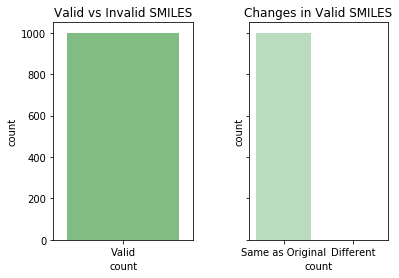

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.DataFrame(valandnot)
df.columns = ['count']
#ax = sns.countplot(x="count", data=df)

df2 = pd.DataFrame(same)
df2.columns = ['count']
#ax2 = sns.countplot(x="count", data=df2)

# Plotting them ide by side
fig, ax =plt.subplots(1,2, sharey=True)
sns.countplot(x="count", data=df,  palette=("YlGn"), ax=ax[0]).set_title('Valid vs Invalid SMILES')
sns.countplot(x="count", data=df2, palette=("GnBu"), ax=ax[1]).set_title('Changes in Valid SMILES')
fig.subplots_adjust(wspace=0.4)
fig.show()

#Barplots with % - change Invalid SMILES and Valid SMILES to numerical data
#ax = sns.barplot(x="count", y="count", data=df, estimator=lambda x: len(x) / len(df) * 100)
#ax.set(ylabel="Percent")
#ax.set_title('Number of Correct (1) and Incorrect (0) SMILES')

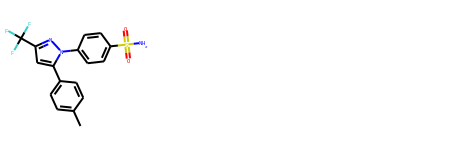

In [ ]:
#unique_set = set(rec_smiles)

#Check for valid molecules and plot them 

from rdkit import RDLogger

lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

working_mols = []

for smiles in rec_smiles:
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            working_mols.append(mol)
    except:
        continue

#getting unique smiles
smiles_list = []
for mol in working_mols:
  smile = Chem.MolToSmiles(mol)
  smiles_list.append(smile)

unique_smiles = set(smiles_list)

#converting smiles back to molecule object that RDKit can plot
molecules_to_plot = []
for smile in unique_smiles:
  mol = Chem.MolFromSmiles(smile)
  molecules_to_plot.append(mol)

       
Draw.MolsToGridImage(molecules_to_plot, molsPerRow=3, subImgSize=(150, 150), maxMols=20)  

##**2. Sampling Latent Space**

In [ ]:
#Sampling space around the original molecule by generating 1k nearest neighbours 
#mean is the latent space of the original molecule, standard deviation 0.1


stdev = 0.05
latent_mols = stdev * np.random.randn(1000, latent_dim) + smiles_latent

decoded_molecules = []

for lm in latent_mols:
    decoded_molecules.append(decode_latent_molecule(lm, model, charset, latent_dim))

/root/miniconda/lib/python3.6/site-packages/rdkit/Chem/Draw/IPythonConsole.py:186: UserWarning: Truncating the list of molecules to be displayed to 48. Change the maxMols value to display more.
  % (maxMols))


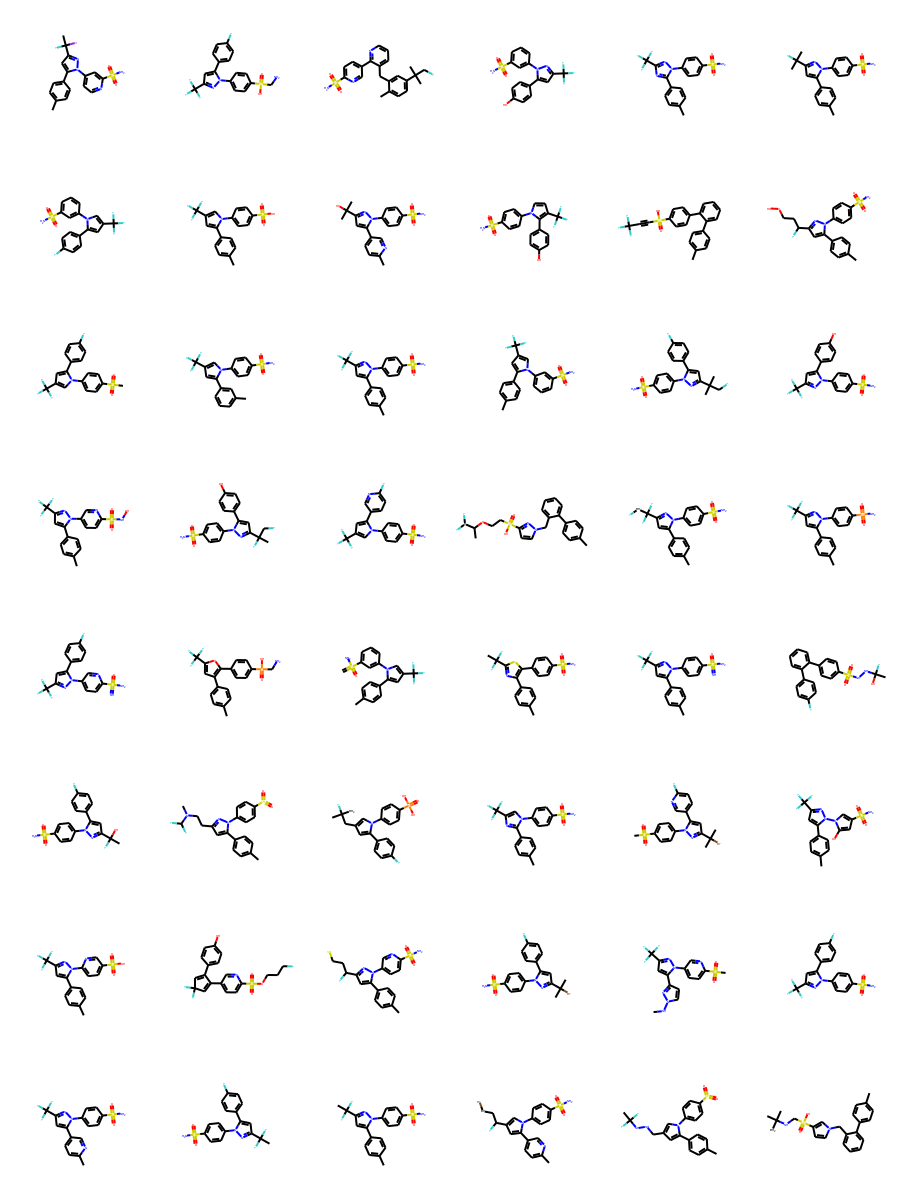

In [ ]:
  # remove warnings and errors from notebook (lots of them due non valid molecule generation)
#unique_set = set(rec_smiles)

#Check for valid molecules and plot them 

from rdkit import RDLogger

lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

working_mols = []

for smiles in decoded_molecules:
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            working_mols.append(mol)
    except:
        continue

#getting unique smiles
smiles_list = []
for mol in working_mols:
  smile = Chem.MolToSmiles(mol)
  smiles_list.append(smile)

unique_smiles = set(smiles_list)

#converting smiles back to molecule object that RDKit can plot
molecules_to_plot = []
for smile in unique_smiles:
  mol = Chem.MolFromSmiles(smile)
  molecules_to_plot.append(mol)
       
Draw.MolsToGridImage(molecules_to_plot, molsPerRow=6, subImgSize=(150, 150), maxMols=48)  

### Creating DataFrame

In [ ]:
#Adding original molecule to the decoded molecules list
decoded_smiles_set = set(decoded_molecules)
decoded_smiles = decoded_molecules
smiles = 'CC(=O)Nc1ccc(O)cc1'
decoded_smiles.insert(0, smiles)

In [ ]:
decoded_molecules[0]
print(decoded_molecules[0],decoded_smiles[0],decoded_smiles[1])

CC(=O)Nc1ccc(O)cc1 CC(=O)Nc1ccc(O)cc1 NC(=N)Nc1cccc(Ncc1


In [ ]:
#having the original smile already in the list 
validmolecules = []
     
for molecule in decoded_smiles:
  try:
    m = Chem.MolFromSmiles(molecule,sanitize=False)
  except:
    validmolecules.append(0)
  else:
    try:
      Chem.SanitizeMol(m)
    except:
      validmolecules.append(0)
    else:
      validmolecules.append(1)

In [ ]:
len(validmolecules)

1001

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools

#adding the original molecule
latent = np.append(smiles_latent, latent_mols, axis=0)


df = pd.DataFrame(list(zip(latent, decoded_smiles, validmolecules)),
              columns=['latent_mols','decoded_mols','valid_mols'])

#adding images of molecules
#PandasTools.AddMoleculeColumnToFrame(df,'decoded_mols','Molecule')


### Visualizing Latent Space using PCA

In [ ]:
#latent_mols
#https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(latent)
pca1 = pca_result[:,0]
pca2 = pca_result[:,1] 
#pca3 = pca_result[:,2]


df['PCA_1'] = pca1
df['PCA_2'] = pca2


In [ ]:
#removing invalid molecules

df1 = df[df.valid_mols != 0]
df1 = df1.drop(columns=['valid_mols'])
df1 = df1.drop(columns = ['latent_mols'])

#cleaning the dataframe and adding the original or not column
df1["org"] = 'Valid'
df1 = df1.reset_index()
df1 = df1.drop(columns = ['index'])
df1.iat[0, 3] = 'Original'

#renaming the df
#sampled_df = df

In [ ]:
df2 = df[df.valid_mols != 1]
df2 = df2.drop(columns=['valid_mols'])
df2 = df2.drop(columns = ['latent_mols'])
df2["org"] = 'Invalid'
df2 = df2.reset_index()
df2 = df2.drop(columns=['index'])


In [ ]:
sampled_df = pd.concat([df1, df2], ignore_index=True)

In [ ]:
import altair as alt

domain = ['Invalid', 'Original', 'Valid']
range_ = ['gray', 'black', 'purple']

All = alt.Chart(sampled_df,title='PCA').mark_circle(size = 25).encode(
    x='PCA_1',
    y='PCA_2',
    
    #color=alt.Color('org', legend=alt.Legend(title="Points by Validity"))
    color=alt.Color('org', scale=alt.Scale(domain=domain, range=range_)),
    opacity=alt.value(0.5)
).interactive()

All
#Split Data frame into 3 and plot each of them


alt.Chart(...)

In [ ]:
#3 seperate data frames 
dfa = sampled_df['org'].str.contains('Original')
df_Original = df[dfa]
#df1 = valid
#df2 = invalid
df_Original

,latent_mols,decoded_mols,valid_mols,PCA_1,PCA_2
0,"[0.03309061378240585, -0.0009909234941005707, ...",CC(=O)Nc1ccc(O)cc1,1,0.000105,0.001167


In [ ]:
#plotting from two different dataframes

import pandas as pd
import altair as alt



#Invalid
chart1 = alt.Chart(df2,title='PCA').mark_circle(size = 25,color='gray', opacity=0.2).encode(
    x='PCA_1',
    y='PCA_2')

#valid
chart2 = alt.Chart(df1,title='PCA').mark_circle(size = 25,color='violet', opacity=0.3).encode(
    x='PCA_1',
    y='PCA_2')

#Original
chart3 = alt.Chart(df_Original,title='PCA').mark_circle(size = 100,color='black').encode(
    x='PCA_1',
    y='PCA_2')


chart = All + chart1 + chart2 + chart3
chart.interactive()

alt.LayerChart(...)

### Morgan Fingerprints - Tanimoto similarity

In [ ]:
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols

ref = Chem.MolFromSmiles(smiles)
ref_morgan = AllChem.GetMorganFingerprint(ref,2)

mol_morgan = []

for mol in working_mols:
  x = AllChem.GetMorganFingerprint(mol,2)
  mol_morgan.append(x)
  
tanimoto_distance = []

for x in mol_morgan:  
  y = DataStructs.TanimotoSimilarity(ref_morgan,x)
  tanimoto_distance.append(y)
  

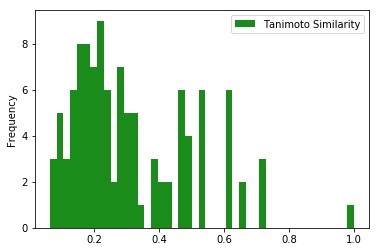

In [ ]:
import pandas as pd

df = pd.DataFrame(tanimoto_distance, columns = ['Tanimoto Similarity'])
ax = df.plot.hist(bins = 45, alpha=0.9, color='green') #bins = 25

#### Weights

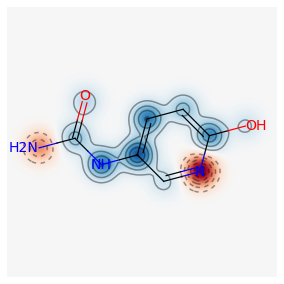

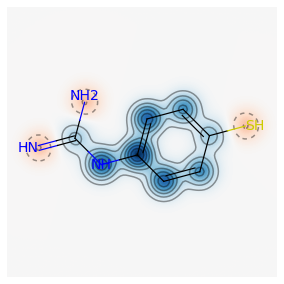

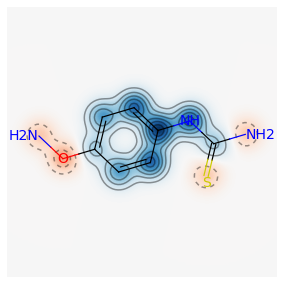

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
from matplotlib.pyplot import figure, show

#unique_smiles - unique smiles produced
#molecules_to_plot 

refmol = Chem.MolFromSmiles(smiles)
mols = molecules_to_plot[1:4]

for x in mols:
  #mol = Chem.MolFromSmiles(x)
  weights = SimilarityMaps.GetAtomicWeightsForFingerprint(refmol, x,
                                                          SimilarityMaps.GetMorganFingerprint,
                                                          metric=DataStructs.TanimotoSimilarity)
  
  fig = SimilarityMaps.GetSimilarityMapFromWeights(x, weights,size=(150, 150),
                                                   colorMap='RdBu',
                                                   alpha = 0.4,
                                                   scale = -0.5)
  

### Maximum Common Structure

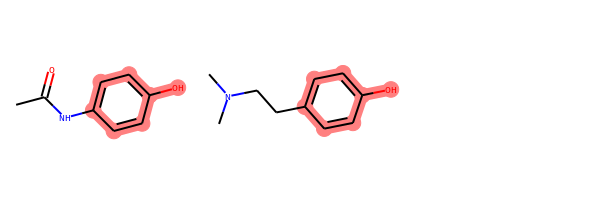

In [ ]:
from rdkit.Chem import rdFMCS
from rdkit.Chem import MolToSmiles
from rdkit import Chem
from rdkit.Chem import rdBase
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit import RDConfig
import os


m = Chem.MolFromSmiles(smiles)

unique_mols = [m,working_mols[0]]
res=rdFMCS.FindMCS(unique_mols, completeRingsOnly=True)
smarts = res.smartsString #from MCS to smarts
mol1 = Chem.MolFromSmarts(smarts)
smile = Chem.MolToSmiles(mol1)
core = Chem.MolFromSmiles( smile )
  
Draw.MolsToGridImage(unique_mols, molsPerRow=3, highlightAtomLists=[mol.GetSubstructMatch(core) for mol in unique_mols] )


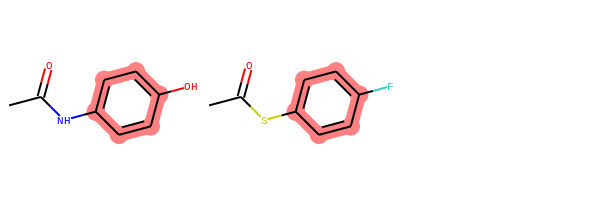

In [ ]:
m = Chem.MolFromSmiles(smiles)

unique_mols = [m,working_mols[1]]
res=rdFMCS.FindMCS(unique_mols, completeRingsOnly=True)
smarts = res.smartsString #from MCS to smarts
mol1 = Chem.MolFromSmarts(smarts)
smile = Chem.MolToSmiles(mol1)
core = Chem.MolFromSmiles( smile )
  
Draw.MolsToGridImage(unique_mols, molsPerRow=3, highlightAtomLists=[mol.GetSubstructMatch(core) for mol in unique_mols] )


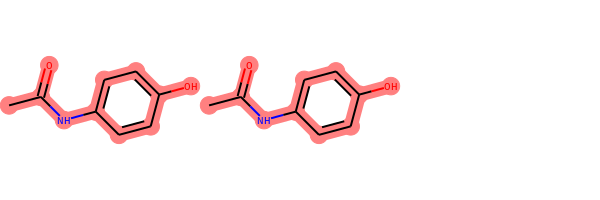

In [ ]:
m = Chem.MolFromSmiles(smiles)

unique_mols = [m,working_mols[2]]
res=rdFMCS.FindMCS(unique_mols, completeRingsOnly=True)
smarts = res.smartsString #from MCS to smarts
mol1 = Chem.MolFromSmarts(smarts)
smile = Chem.MolToSmiles(mol1)
core = Chem.MolFromSmiles(smile)
  
Draw.MolsToGridImage(unique_mols, molsPerRow=3, highlightAtomLists=[mol.GetSubstructMatch(core) for mol in unique_mols] )


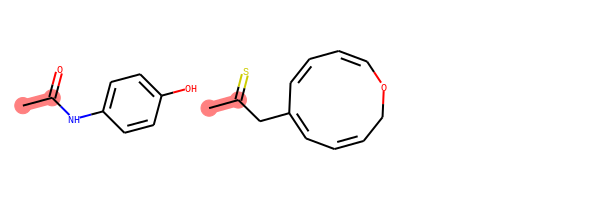

In [ ]:
m = Chem.MolFromSmiles(smiles)

unique_mols = [m,working_mols[3]]

res=rdFMCS.FindMCS(unique_mols, completeRingsOnly=True)
smarts = res.smartsString #from MCS to smarts
mol1 = Chem.MolFromSmarts(smarts)
smile = Chem.MolToSmiles(mol1)
core = Chem.MolFromSmiles(smile)
  
Draw.MolsToGridImage(unique_mols, molsPerRow=3, highlightAtomLists=[mol.GetSubstructMatch(core) for mol in unique_mols] )


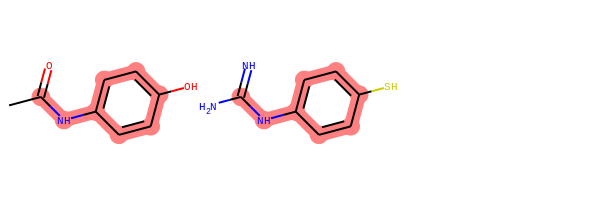

In [ ]:
m = Chem.MolFromSmiles(smiles)

unique_mols = [m,working_mols[4]]

res=rdFMCS.FindMCS(unique_mols, completeRingsOnly=True)
smarts = res.smartsString #from MCS to smarts
mol1 = Chem.MolFromSmarts(smarts)
smile = Chem.MolToSmiles(mol1)
core = Chem.MolFromSmiles(smile)
  
Draw.MolsToGridImage(unique_mols, molsPerRow=3, highlightAtomLists=[mol.GetSubstructMatch(core) for mol in unique_mols] )


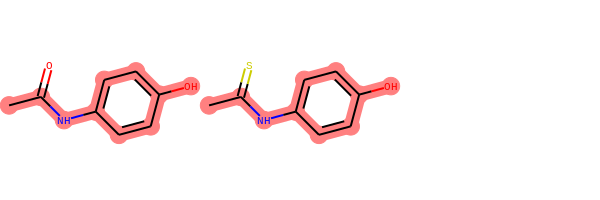

In [ ]:
m = Chem.MolFromSmiles(smiles)

unique_mols = [m,working_mols[8]]

res=rdFMCS.FindMCS(unique_mols, completeRingsOnly=True)
smarts = res.smartsString #from MCS to smarts
mol1 = Chem.MolFromSmarts(smarts)
smile = Chem.MolToSmiles(mol1)
core = Chem.MolFromSmiles(smile)
  
Draw.MolsToGridImage(unique_mols, molsPerRow=3, highlightAtomLists=[mol.GetSubstructMatch(core) for mol in unique_mols] )


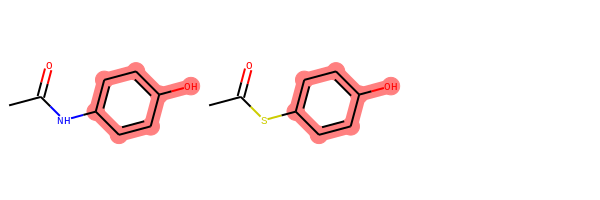

In [ ]:
m = Chem.MolFromSmiles(smiles)

unique_mols = [m,working_mols[6]]

res=rdFMCS.FindMCS(unique_mols, completeRingsOnly=True)
smarts = res.smartsString #from MCS to smarts
mol1 = Chem.MolFromSmarts(smarts)
smile = Chem.MolToSmiles(mol1)
core = Chem.MolFromSmiles(smile)
  
Draw.MolsToGridImage(unique_mols, molsPerRow=3, highlightAtomLists=[mol.GetSubstructMatch(core) for mol in unique_mols] )


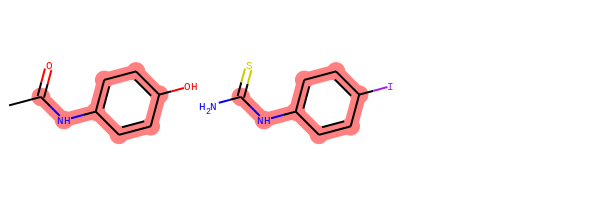

In [ ]:
m = Chem.MolFromSmiles(smiles)

unique_mols = [m,working_mols[10]]

res=rdFMCS.FindMCS(unique_mols, completeRingsOnly=True)
smarts = res.smartsString #from MCS to smarts
mol1 = Chem.MolFromSmarts(smarts)
smile = Chem.MolToSmiles(mol1)
core = Chem.MolFromSmiles(smile)
  
Draw.MolsToGridImage(unique_mols, molsPerRow=3, highlightAtomLists=[mol.GetSubstructMatch(core) for mol in unique_mols] )


###Interpolation 

In [ ]:
#original interpolarion - curse of dimensionality not taken into account 

def interpolate(source_smiles, dest_smiles, steps, charset, model, latent_dim):
  
    source_latent = encode_smiles(source_smiles, model, charset)
    dest_latent = encode_smiles(dest_smiles, model, charset)
    
    step = (dest_latent - source_latent) / float(steps)
    results = []
    for i in range(steps):
        item = source_latent + (step * i)        
        decoded = decode_latent_molecule(item, model, charset, latent_dim)
        results.append(decoded)
    return results

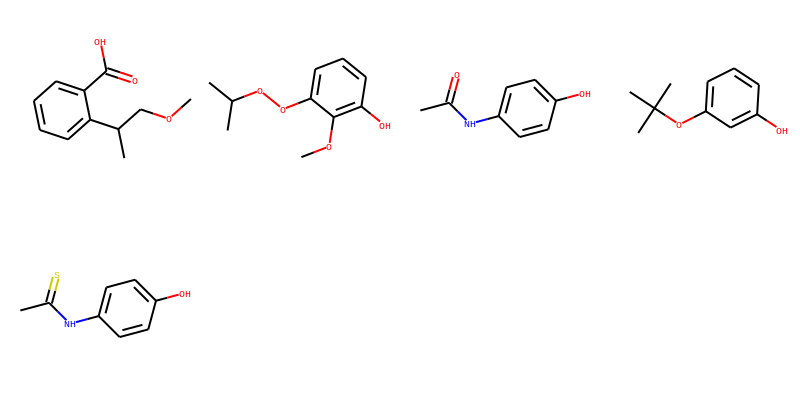

In [ ]:
paracetamol = 'CC(=O)Nc1ccc(O)cc1'
aspirin = 'O=C(C)Oc1ccccc1C(=O)O'


steps = 300
results = interpolate(paracetamol, aspirin, steps, charset, model, latent_dim)
    
res = set(list(results))

working_results = []
for smiles in res:
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            working_results.append(mol)
    except:
        continue
        
Draw.MolsToGridImage(working_results, molsPerRow=4)
                

In [ ]:
#interpolation

def interpolate_polar(source_smiles, dest_smiles, charset, model, latent_dim):
  from math import sqrt
  
  source_latent = encode_smiles(source_smiles, model, charset)
  dest_latent = encode_smiles(dest_smiles, model, charset)
  
  mols = []
  for i in range(0,100):
    p = i/100
    
    item = sqrt(p)*source_latent + sqrt(1-p)*dest_latent
    decoded = decode_latent_molecule(item, model, charset, latent_dim)
    mols.append(decoded)
    
  return mols


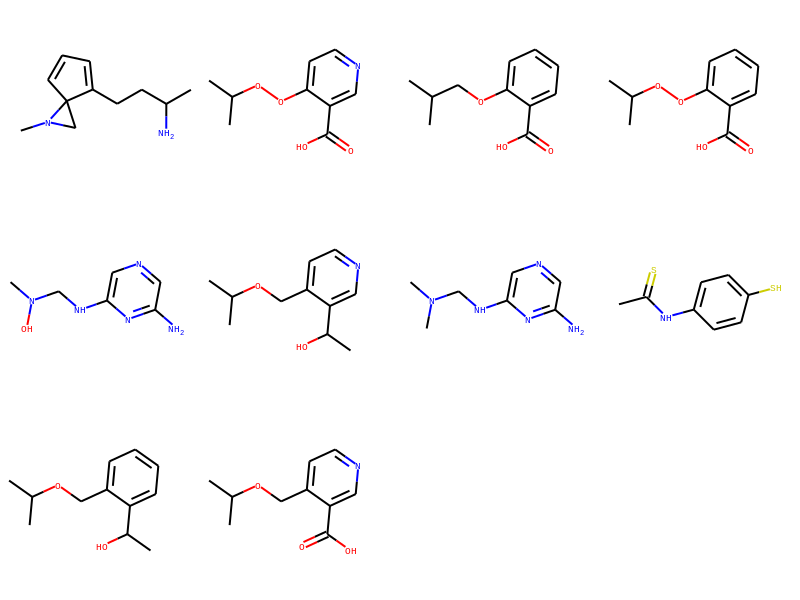

In [ ]:
paracetamol = 'CC(=O)Nc1ccc(O)cc1'
aspirin = 'O=C(C)Oc1ccccc1C(=O)O'


results_new = interpolate_polar(paracetamol, aspirin, charset, model, latent_dim)
    
res_new = set(list(results_new))

working_results_new = []
for smiles in res_new:
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            working_results_new.append(mol)
    except:
        continue
        
Draw.MolsToGridImage(working_results_new, molsPerRow=4)
                

In [ ]:
Latent_1 = start - paracetamol
latent_2 = finish -aspirin
latent_interpolted = interpolated
latent_of_all_molecules

#interpolation

def interpolate_polar(source_smiles, dest_smiles, charset, model, latent_dim):
  from math import sqrt
  
  source_latent = encode_smiles(source_smiles, model, charset)
  dest_latent = encode_smiles(dest_smiles, model, charset)
  
  mols = []
  for i in range(0,100):
    p = i/100
    
    item = sqrt(p)*source_latent + sqrt(1-p)*dest_latent
    decoded = decode_latent_molecule(item, model, charset, latent_dim)
    mols.append(decoded)
    
    

  return mols



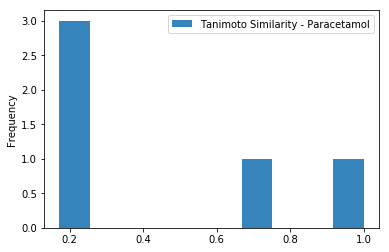

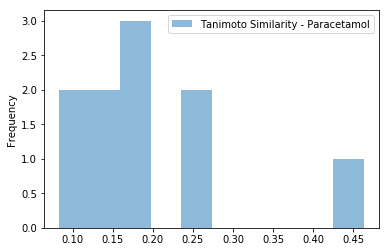

In [ ]:
#tanimoro similarity of both on the same plot - to compare the results 
#to aspirin
#to paracetamol 

paracetamol = 'CC(=O)Nc1ccc(O)cc1'
aspirin = 'O=C(C)Oc1ccccc1C(=O)O'


#working_results
#working_results_new

from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols

ref = Chem.MolFromSmiles('CC(=O)Nc1ccc(O)cc1')
ref_morgan = AllChem.GetMorganFingerprint(ref,2)

#old

mol_morgan = []

for mol in working_results:
  x = AllChem.GetMorganFingerprint(mol,2)
  mol_morgan.append(x)
  
tanimoto_distance = []

for x in mol_morgan:  
  y = DataStructs.TanimotoSimilarity(ref_morgan,x)
  tanimoto_distance.append(y)

import pandas as pd

d = pd.DataFrame(tanimoto_distance, columns = ['Tanimoto Similarity - Paracetamol'])
a = d.plot.hist(bins = 10, alpha=0.9) #bins = 25

#new

mol_morgan2 = []

for mol in working_results_new:
  x = AllChem.GetMorganFingerprint(mol,2)
  mol_morgan2.append(x)
  
tanimoto_distance2 = []

for x in mol_morgan2:  
  y = DataStructs.TanimotoSimilarity(ref_morgan,x)
  tanimoto_distance2.append(y)

import pandas as pd

df = pd.DataFrame(tanimoto_distance2, columns = ['Tanimoto Similarity - Paracetamol'])
ax = df.plot.hist(bins = 10, alpha=0.5) #bins = 25


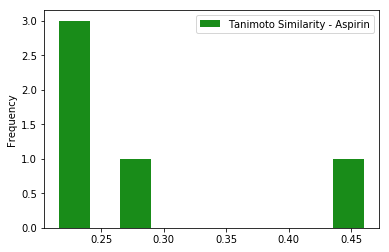

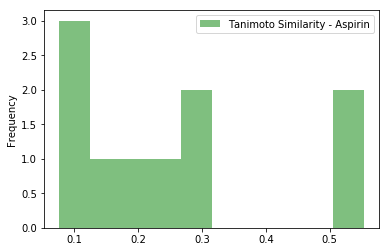

In [ ]:
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols

ref = Chem.MolFromSmiles('O=C(C)Oc1ccccc1C(=O)O')
ref_morgan = AllChem.GetMorganFingerprint(ref,2)

#old

mol_morgan = []

for mol in working_results:
  x = AllChem.GetMorganFingerprint(mol,2)
  mol_morgan.append(x)
  
tanimoto_distance = []

for x in mol_morgan:  
  y = DataStructs.TanimotoSimilarity(ref_morgan,x)
  tanimoto_distance.append(y)

import pandas as pd

d2 = pd.DataFrame(tanimoto_distance, columns = ['Tanimoto Similarity - Aspirin'])
a = d2.plot.hist(bins = 10, alpha=0.9, color ='green') #bins = 25

#new

mol_morgan2 = []

for mol in working_results_new:
  x = AllChem.GetMorganFingerprint(mol,2)
  mol_morgan2.append(x)
  
tanimoto_distance2 = []

for x in mol_morgan2:  
  y = DataStructs.TanimotoSimilarity(ref_morgan,x)
  tanimoto_distance2.append(y)

import pandas as pd

df2 = pd.DataFrame(tanimoto_distance2, columns = ['Tanimoto Similarity - Aspirin'])
ax = df2.plot.hist(bins = 10, alpha=0.5, color='green') #bins = 25

In [ ]:
aa = pd.DataFrame({'a': pd.Series(tanimoto_distance), 'b': pd.Series(tanimoto_distance2)})
aa

,a,b
0,0.460000,0.076923
1,0.216667,0.303571
2,0.274510,0.553191
3,0.218182,0.553191
4,0.226415,0.096774
5,NaN,0.140625
6,NaN,0.079365
7,NaN,0.203704
8,NaN,0.258621
9,NaN,0.280702


In [ ]:
import pandas as pd
import altair as alt
import numpy as np
np.random.seed(42)

Ch1 = alt.Chart(aa).mark_area(
    opacity=0.3,
    interpolate='step'
).encode(
    alt.X('b', bin=alt.Bin(maxbins=10)),
    alt.Y('count()', stack=None)
)

Ch2 = alt.Chart(aa).mark_area(
    opacity=0.9,
    interpolate='step'
).encode(
    alt.X('a', bin=alt.Bin(maxbins=10)),
    alt.Y('count()', stack=None)
)

Ch1 + Ch2

alt.LayerChart(...)

/root/miniconda/lib/python3.6/site-packages/rdkit/Chem/Draw/IPythonConsole.py:186: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


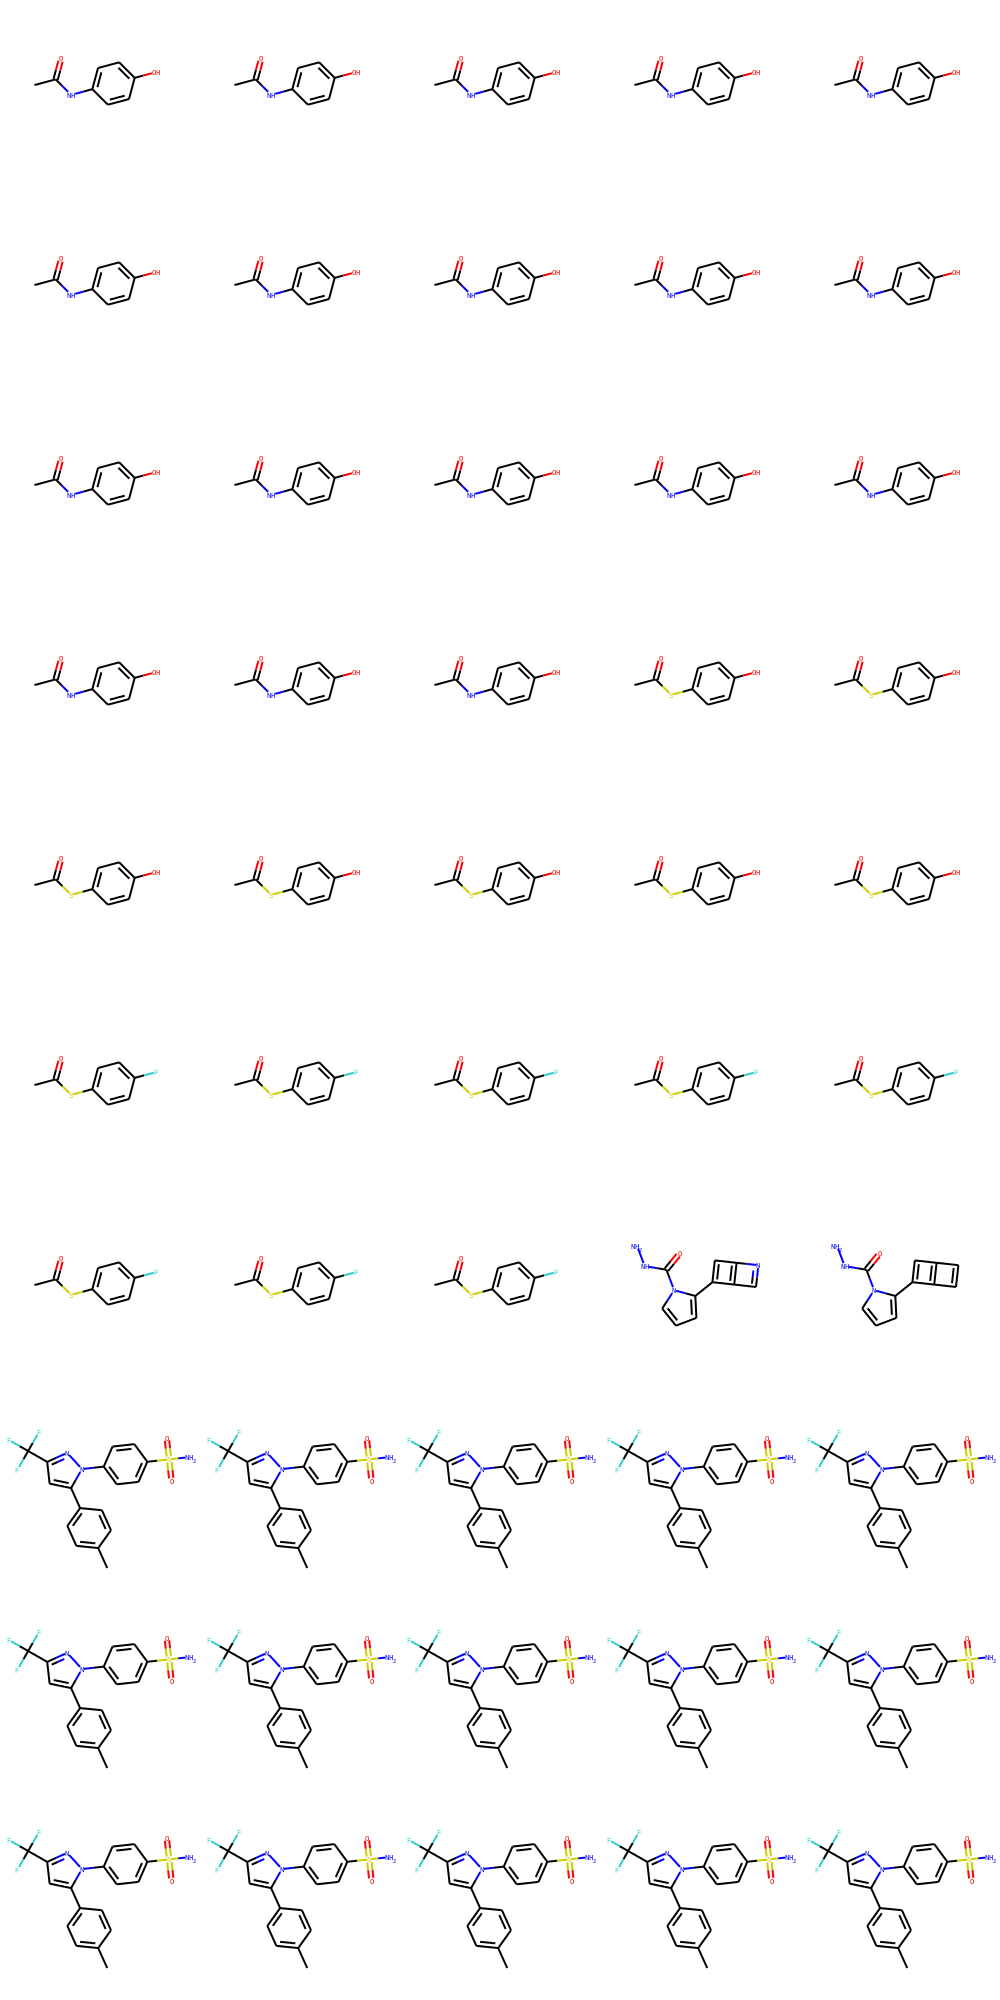

In [ ]:
paracetamol_smiles = 'CC(=O)Nc1ccc(O)cc1'
celecoxib_smiles = 'Cc1ccc(cc1)c2cc(nn2c3ccc(cc3)S(=O)(=O)N)C(F)(F)F'

steps = 300
results = interpolate(paracetamol_smiles, celecoxib_smiles, steps, charset, model, latent_dim)
    
working_results = []
for smiles in results:
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            working_results.append(mol)
    except:
        continue
                
Draw.MolsToGridImage(working_results, molsPerRow=5)

###unique molecules

In [ ]:
def get_unique_mols(mol_list):
    inchi_keys = [Chem.InchiToInchiKey(Chem.MolToInchi(m)) for m in mol_list]
    u, indices = np.unique(inchi_keys, return_index=True)
    unique_mols = [[mol_list[i], inchi_keys[i]] for i in indices]
    return unique_mols

In [ ]:
import requests

url = 'https://www.ebi.ac.uk/unichem/rest/inchikey/{}'

unique_mols = get_unique_mols(working_mols)

in_unichem = []
for um in unique_mols:
    res = requests.get(url.format(um[1]))
    if res.status_code == 200:
        in_unichem.append([um[0], res.json()])

not_in_chembl = filter(lambda mol: 1 not in [int(res['src_id']) for res in mol[1]], in_unichem)

print ("Generated:", len())
print ("rdkit valid mols:", len(working_mols))
print ("unique molecules:", len(unique_mols))
print ("found in unichem:", len(in_unichem))
#print ("found in unichem and not in chembl:", len(not_in_chembl))

rdkit valid mols: 120
unique molecules: 106
found in unichem: 52


### more plots


####QED

In [ ]:
#QED stands for quantitative estimation of drug-likeness and the concept was for the first time introduced 
#by Richard Bickerton and coworkers [1]. The empirical rationale of the QED measure reflects the underlying 
#distribution of molecular properties including molecular weight, logP, topological polar surface area, number 
#of hydrogen bond donors and acceptors, the number of aromatic rings and rotatable bonds, and the presence of 
#unwanted chemical functionalities.

#https://iwatobipen.wordpress.com/2017/10/18/qed-calculation-on-rdkit-2017-09-rdkit/
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3524573/
#https://www.ddw-online.com/drug-discovery/p217618-rules-for-drug-discovery:-can-simple-property-criteria-help-you-to-find-a-drug.html
#QED uses cLogP


mol = Chem.MolFromSmiles('O=C(C)Oc1ccccc1C(=O)O')
from rdkit.Chem import QED
QED.default(mol)


0.5501217966938848

####Drugbank smiles latent space viz

In [ ]:
import pandas as pd 

drugbank_smiles_df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/VAE - Thesis/drugbank_smiles.tsv',
                               delimiter='\t',
                               encoding='utf-8',
                               names=['inch','smiles'])

In [ ]:
drugbank_smiles_df.head()

,inch,smiles
0,ZAKOWWREFLAJOT-CEFNRUSXSA-N,CC(=O)Oc1c(C)c(C)c2c(c1C)CCC(C)(CCCC(C)CCCC(C)...
1,IELOKBJPULMYRW-NJQVLOCASA-N,Cc1c(C)c2c(c(C)c1OC(=O)CCC(=O)O)CCC(C)(CCCC(C)...
2,ZUHZGEOKBKGPSW-UHFFFAOYSA-N,COCCOCCOCCOCCOC
3,GOIFCXRIFSYPFG-UHFFFAOYSA-N,Cn1ncnc1COc1nn2c(-c3c(F)cccc3F)nnc2cc1C1CCC1
4,AMEWZCMTSIONOX-UHFFFAOYSA-N,c1ccc(-c2cc(CCC3CCNCC3)c3ccccc3n2)cc1


In [ ]:
#Convert a SMILES string to canonical SMILES
#A SMILES string is a way to represent a 2D molecular graph as a 1D string. In most cases there are many possible 
#SMILES strings for the same structure. Canonicalization is a way to determine which of all possible SMILES will 
#be used as the reference SMILES for a molecular graph.
#https://ctr.fandom.com/wiki/Convert_a_SMILES_string_to_canonical_SMILES

#df.apply(function)

smileslist = drugbank_smiles_df['smiles'].tolist()
#len(smileslist) #7991

from rdkit import Chem

canonical_smiles = []
for smile in smileslist:
  mol = Chem.MolFromSmiles(smile)
  cansmi = Chem.MolToSmiles(mol)
  canonical_smiles.append(cansmi)

In [ ]:
#latent space of all smiles 

latent_spaces = []
for smiles in canonical_smiles:
  smiles_latent = encode_smiles(smiles, model, charset)
  latent_spaces.append(smiles_latent)
  
  
#add latent space of produced smiles from a molecule to the same dataframe
#add category for different colours 
#do pca on a column after 



In [ ]:
print(latent_spaces[0].shape,latent[0].shape)

(1, 292) (292,)


In [ ]:
#falttening the list of arrays
latent_spaces_flat = [i[0] for i in latent_spaces]
latent_spaces_flat[0].shape

(292,)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(latent_spaces_flat)
allpca1 = pca_result[:,0]
allpca2 = pca_result[:,1] 
#allpca3 = pca_result[:,2]

#create dataset with canonical smiles and their pca 1 and pca 2 
all_df = pd.DataFrame(canonical_smiles, columns = ['SMILES']) 
all_df['PCA_x'] = allpca1
all_df['PCA_y'] = allpca2
#all_df['PCA_z'] = allpca3

In [ ]:
import altair as alt
alt.data_transformers.disable_max_rows()


chart1 = alt.Chart(all_df,title='Latent Space Vizualisation').mark_circle(size = 4).encode(
    x='PCA_x',
    y='PCA_y'
).interactive()


chart1

alt.Chart(...)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(latent_spaces_flat)
allpca13d = pca_result[:,0]
allpca23d = pca_result[:,1] 
allpca33d = pca_result[:,2]

#create dataset with canonical smiles and their pca 1 and pca 2 
all_df3d = pd.DataFrame(canonical_smiles, columns = ['SMILES']) 
all_df3d['PCA_x'] = allpca13d
all_df3d['PCA_y'] = allpca23d
all_df3d['PCA_z'] = allpca33d

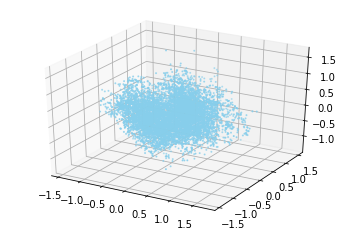

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(all_df3d['PCA_x'], all_df3d['PCA_y'], all_df3d['PCA_z'], c='skyblue', s=1)
#ax.view_init(30, 185)
plt.show()
